## **Introduction to Image Processing**

Mojdeh Rastgoo - Desire Sidibe

## 3. Interpolation and Blending

 Importing necessary libraries/modules and functions

In [29]:
% matplotlib inline
% pprint off


# Import the library as show images, plot, etc.
import matplotlib.pyplot as plt
# Import functionality for the color map
import matplotlib.cm as cm

# Import system specific parameters and function
import sys 

## Other plotting libraries
# import seaborn as sns

# Import the library to mange the matrix and array 
import numpy as np

# Importing image processing toolbox 
## Module to read, write,... 
from skimage import io
## Module to convert the image on 8 bits
from skimage import img_as_ubyte
## Module to convert the image to float
from skimage import img_as_float
## Module for color conversion 
from skimage import color
## Module image transform from skimage for resize 
from skimage import transform
## Module misc from scipy for resize 
from scipy import misc
## Module util from skimage 
from PIL import Image

from pylab import subplot



Pretty printing has been turned OFF


ModuleNotFoundError: No module named 'cv2'

### 3.1  Resizing an image size using different interpolation functions

** Q.1 Resize the `lena` or `vibot` image using nearest, bilinear and bicubic function.** 

You can define your function which accept the model and resize size from the user or just run a script.

In [2]:
img_path = './images/'
img_name = 'lena-grey.bmp'
lena_im = io.imread(img_path.__add__(img_name))

lena_near = misc.imresize(lena_im, 20, interp = 'nearest', mode = None)
lena_bilinear = misc.imresize(lena_im, 20, interp = 'bilinear', mode = None)
lena_bicubic = misc.imresize(lena_im, 20, interp = 'bicubic', mode = None)

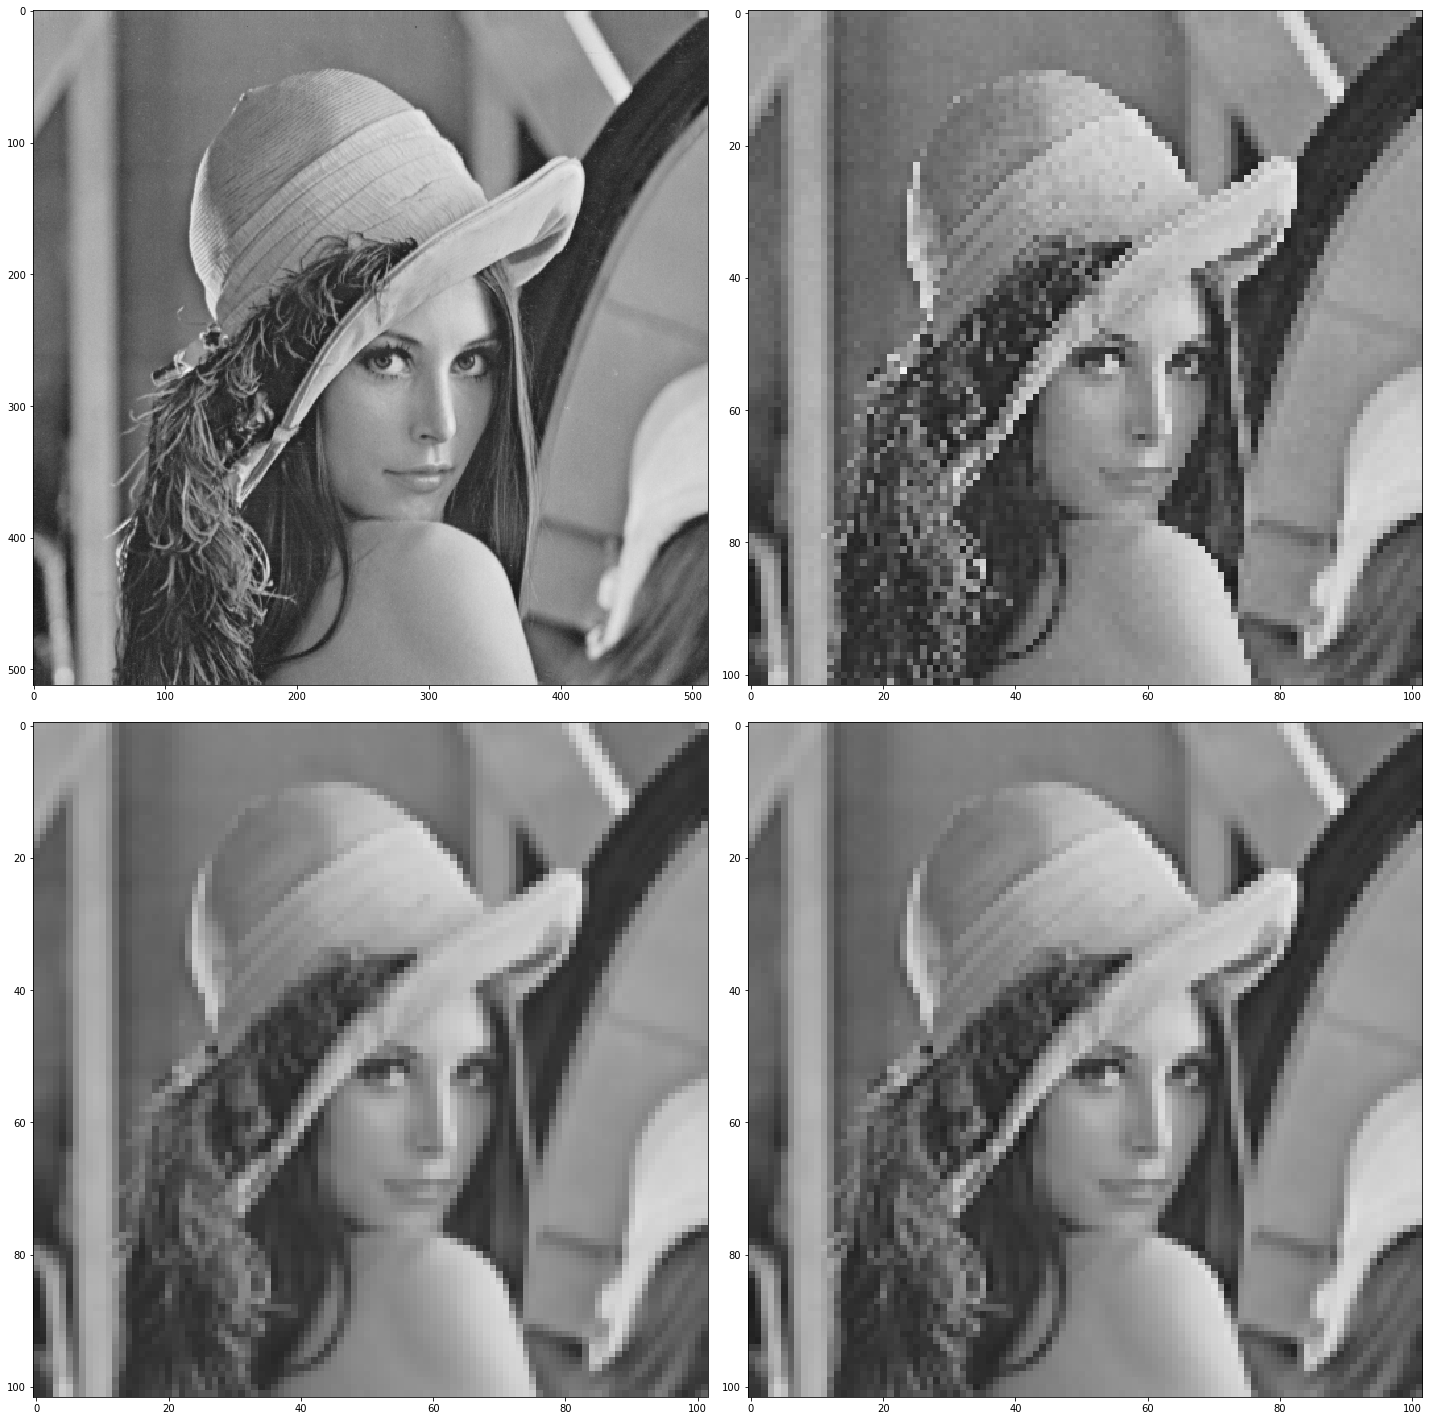

In [3]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(20, 20))
subplot(2,2,1)
io.imshow(lena_im)
subplot(2,2,2)
io.imshow(lena_near)
subplot(2,2,3)
io.imshow(lena_bilinear)
subplot(2,2,4)
io.imshow(lena_bicubic)

**Q.2 Write three functions that performs `simple_blend`, `alpha_blend` and `pyramid_blend`**

** Using your functions, blend `orange` and `apple` images together.**


In [102]:
def simple_blend (image1, image2):
    blend_image = np.zeros_like(image1)
    height, width, depth = image1.shape
    for i in range(0, height):
        for j in range(0, np.ceil(width/2).astype('ubyte')):
            blend_image[i,j] = image1[i,j]
    for i in range(0, height):
        for j in range(np.ceil(width/2).astype('ubyte'), width):
            blend_image[i,j] = image2[i,j]
    return blend_image 

def alpha_blend(image1, image2, window):
    blend_image = np.zeros_like(image1)
    height, width, depth = image1.shape
    for i in range(0, height):
        for j in range(0, np.ceil(width/2).astype('ubyte')-window):
            blend_image[i,j] = image1[i,j]    
    for i in range(0, height):
        for j in range(np.ceil(width/2).astype('ubyte')+window, width):
            blend_image[i,j] = image2[i,j]
    x1 = np.ceil(width/2).astype('ubyte')-window   
    x2 = np.ceil(width/2).astype('ubyte')+window   
    x = np.arange(x1, x2)
    alpha = x/(x1-x2)-x2/(x1-x2)
    for i in range(0, height):
        for j in range(np.ceil(width/2).astype('ubyte')-window, np.ceil(width/2).astype('ubyte')+window):
            blend_image[i,j] = alpha[j - np.ceil(width/2).astype('ubyte')-window]*image1[i,j] + (1-alpha[j - np.ceil(width/2).astype('ubyte')-window])*image2[i,j]
    return blend_image   

def pyramid_blend(image1, image2):
    #define 4 levels of gaussian pyramids for both pictures
    gaussian1 = transform.pyramid_gaussian(image1, 3)
    gaussian2 = transform.pyramid_gaussian(image2, 3)
    g1 = [g1 for g1 in gaussian1]
    g2 = [g2 for g2 in gaussian2]
   
    #rescale the 3 bottom levels
    g11rescale = misc.imresize(g1[1], (300,300))/255
    g12rescale = misc.imresize(g1[2], (150,150))/255
    g13rescale = misc.imresize(g1[3], (75,75))/255
     
    #define the mask and compute the gaussian pyramid    
    mask = np.zeros_like(image1)
    for i in range(0, 300):
        for j in range(0, 150):
            mask[i,j] = 1
    gaussianmask = transform.pyramid_gaussian(mask, 3)    
    m = [m for m in gaussianmask] 
    
    #compute the 4 levels of the laplacian pyramid for the first picture
    lapl1_0 = (g1[0]-g11rescale)*m[0]
    lapl1_1 = (g1[1]-g12rescale)*m[1]
    lapl1_2 = (g1[2]-g13rescale)*m[2]
    lapl1_3 = (g1[3])*m[3]

    #now collapse the pyramid
    laplacian1 = lapl1_3
    laplacian1 = (misc.imresize(lapl1_3, (75,75))+lapl1_2)
    laplacian1 = (misc.imresize(laplacian1, (150,150))+lapl1_1)
    laplacian1 = (misc.imresize(laplacian1, (300,300))+lapl1_0)
    
    #repeat the whole algorithm for the second image
    g21rescale = misc.imresize(g2[1], (300,300))/255
    g22rescale = misc.imresize(g2[2], (150,150))/255
    g23rescale = misc.imresize(g2[3], (75,75))/255

    mask = np.zeros_like(image1)
    for i in range(0,300):
        for j in range(150,300):
            mask[i,j] = 1
    gaussianmask = transform.pyramid_gaussian(mask, 3)    
    m = [m for m in gaussianmask] 
    
    lapl2_0 = (g2[0]-g21rescale)*m[0]
    lapl2_1 = (g2[1]-g22rescale)*m[1]
    lapl2_2 = (g2[2]-g23rescale)*m[2]
    lapl2_3 = (g2[3])*m[3]
    
    laplacian2 = lapl2_3
    laplacian2 = ((misc.imresize(lapl2_3, (75,75))+lapl2_2))
    laplacian2 = (misc.imresize(laplacian2, (150,150))+lapl2_1)
    laplacian2 = (misc.imresize(laplacian2, (300,300))+lapl2_0) 
    
    #finally, add the two results together
    blend_image = laplacian1+laplacian2
    
    return blend_image

In [103]:
img_path = './images/'
img_name = 'apple.jpeg'
apple_im = io.imread(img_path.__add__(img_name))

img_path = './images/'
img_name = 'orange.jpeg'
orange_im = io.imread(img_path.__add__(img_name))

simpleblend = simple_blend(apple_im, orange_im)
alphablend = alpha_blend(apple_im, orange_im, 40)
pyramidblend = pyramid_blend(apple_im, orange_im)


C:\Users\Mladen\Anaconda3\lib\site-packages\skimage\io\_plugins\matplotlib_plugin.py:77: UserWarning: Float image out of standard range; displaying image with stretched contrast.
  warn("Float image out of standard range; displaying "


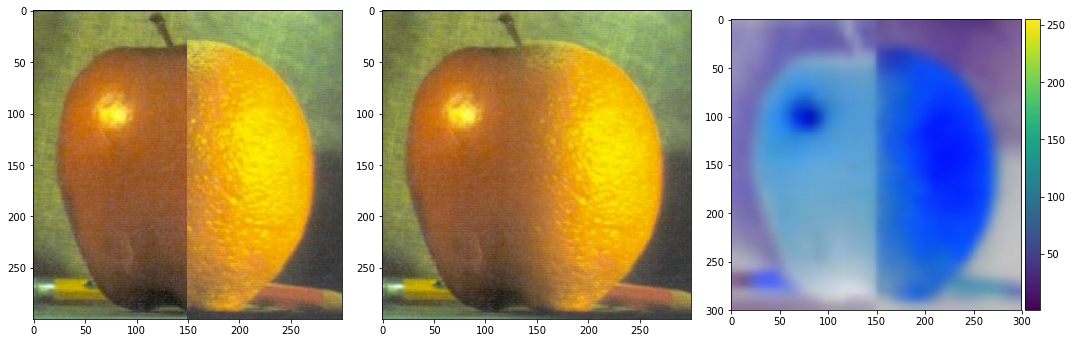

In [104]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 15))
subplot(1,3,1)
io.imshow(simpleblend)
subplot(1,3,2)
io.imshow(alphablend)
subplot(1,3,3)
io.imshow(pyramidblend)